<h1>A Graphical Representation of Energy Generation in the United States</h1>
<p>The amount of electricity produced in the United States, in all energy sectors, show a repeating pattern, similar to that of a periodic function. When graphed, the input (x-axis) of the function is represented with any given and output (y-axis) is represented in amount of energy produced, in terms of megawatts/hour (MWh). This program fetches the raw data, outputs a table of points and draws a graph with the points. Afterwards, using patterns from the data points retrieved, the program determines the appropriate variables for the best-fit sinoidsodal function and graphs it.</p>

<h3>Raw Data</h3>
<p>All data is acquired from the <a href="https://www.eia.gov/electricity/data/browser/#/topic/0?agg=2,0,1&fuel=vvg&geo=g&sec=g&linechart=ELEC.GEN.ALL-US-99.M~ELEC.GEN.COW-US-99.M~ELEC.GEN.NG-US-99.M~ELEC.GEN.NUC-US-99.M~ELEC.GEN.HYC-US-99.M&columnchart=ELEC.GEN.ALL-US-99.M~ELEC.GEN.COW-US-99.M~ELEC.GEN.NG-US-99.M~ELEC.GEN.NUC-US-99.M~ELEC.GEN.HYC-US-99.M&map=ELEC.GEN.ALL-US-99.M&freq=M&start=200101&end=201703&ctype=linechart&ltype=sourcekey&rtype=s&maptype=0&rse=0&pin=">U.S Energy Administration</a> using their API. Afterwards, the data is formatted into a data table using the pandas library, where each cell contains the amount of energy generated every month from 2001 to 2016. From there, the an x and y values are created in the form of lists and are graphed, along with necessary information (labels, etc.) using the matplotlib library.

<h4>Libraries</h4>

In [1]:
import collections
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h4>Data Retrival</h4>

In [2]:
api_key = "http://api.eia.gov/series/?api_key=d8a5f7026a8fa7d6cce0c088293411ad&series_id=ELEC.GEN.ALL-US-99.M"
response = requests.get(api_key)
assert(response.status_code == 200)  # Check if response status is successful.

<h4>Data Processing</h4>

In [3]:
api_data = response.json()
request, series = api_data.values()
raw_energy_data = [i for i in series[0]["data"] if not "2017" in i[0]]
energy_data = {"Years": []}
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for [date, energy] in raw_energy_data:
    year, month = date[:4], months[int(date[4:]) - 1]
    if not year in energy_data["Years"]:
        energy_data["Years"].append(year)
    if not month in energy_data.keys():
        energy_data[month] = []
    energy_data[month].append(energy)

<h4>Data Table</h4>
<ul>
    <li>All values are expressed in 1000 Mega Watts/Hour.</li>
    <li>Data for 2017 is omitted as the year is currently incomplete.</li>
</ul>

In [4]:
sed = collections.OrderedDict()  # sorted energy data
sed["0 Years"] = energy_data["Years"]
for i in range(len(months)):
    month = months[i]
    sed["{}-{}".format(i + 1, month)] = energy_data[month]

df = pd.DataFrame(sed)
df

,0 Years,1-Jan,2-Feb,3-Mar,4-Apr,5-May,6-Jun,7-Jul,8-Aug,9-Sep,10-Oct,11-Nov,12-Dec
0,2016,352745.17901,313749.11355,304168.04465,292835.67462,317337.19170,368417.87262,412449.50037,410113.28228,351768.83182,312828.41367,297427.34849,345238.30656
1,2015,360455.16729,334475.54641,324191.89356,294133.34244,322086.91212,362409.20184,400418.85275,392116.20301,350121.64820,312111.67988,300653.26754,324427.22351
2,2014,377254.71096,324348.43555,331823.05904,297630.58763,324724.30012,357844.04271,385779.55148,384341.14825,339886.50552,314521.99848,317495.00913,337956.65593
3,2013,348967.37792,309728.08000,325398.83402,299332.86831,322155.64042,356822.64723,394845.62080,385285.74515,340940.90155,314925.46247,314539.64185,353021.24773
4,2012,339526.48011,309389.43252,309089.55207,295229.20493,336516.15597,360825.38090,414641.21748,395699.74917,334585.56266,311651.93070,305975.85101,334634.74915
5,2011,362871.89295,313126.60705,318709.94090,302400.72444,323628.23805,367727.01500,418692.75464,406511.31471,337931.31760,308698.50358,304102.15444,335740.46276
6,2010,360957.16695,319734.72667,312167.64032,287800.22656,327936.49155,375759.47838,409725.44035,408884.15537,346045.17182,307920.69056,306009.62912,362119.08129
7,2009,354992.63621,300887.39769,310602.96381,289537.25513,311305.87215,347658.24126,372542.22554,381221.41693,327400.61189,307040.34065,296634.66996,350507.29527
8,2008,362998.42904,325105.59710,324629.84959,305865.03122,325244.80192,373109.02691,402900.33624,388986.71877,338056.12999,318547.34311,310046.24120,343898.25447
9,2007,353531.09477,323230.39483,320471.24253,303129.06360,330202.75802,362754.87722,393226.43225,421796.65927,355393.91186,332615.41638,314102.54260,346290.33052


<h4>Data Points Graphed</h4>

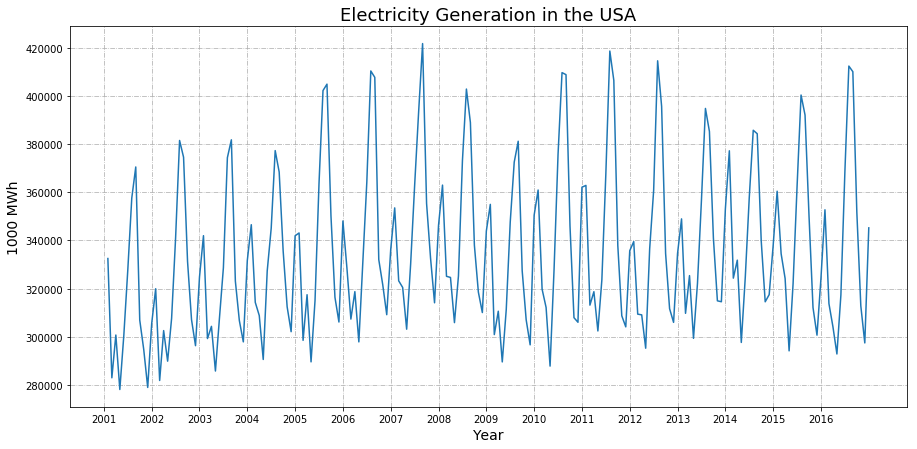

In [5]:
# Data
x_vals = np.arange(1, len(raw_energy_data) + 1)
y_vals = [int(i[1]) for i in raw_energy_data][::-1]  # Reverse values into chronological order.
labels = sorted(list(set([i[0][:4] for i in raw_energy_data])))  # Remove repetitions.
n_months = len(x_vals)
n_years = len(labels)


# Graph
def init_graph(n):
    # Initialize Figure
    fig = plt.figure(figsize=(15, 7))
    axes = fig.add_subplot(1, 1, n)
    return fig, axes


def set_labels(axes):
    axes.set_title("Electricity Generation in the USA", fontsize=18)
    axes.set_xlabel("Year", fontsize=14)
    axes.set_ylabel("1000 MWh", fontsize=14)
    ax1.grid(True, linestyle='-.', linewidth=0.75)  # Grid

    
fig, ax1 = init_graph(1)
set_labels(ax1)

# Plot Graph
ax1.plot(x_vals, y_vals)

# X-Axis Ticks
ax1.set_xticklabels(labels)
ax1.xaxis.set_ticks(np.arange(0, n_months, n_months / n_years))

plt.show()

<h3>Deriving a Best-Fit Equation Manually</h3>
<p>To derive a sinusoidal equation, the coefficients of a standard sinusoidal equation will be acquired using the raw data.</p>
<ul>
    <li>A = Amplitude</li>
    <li>F = Frequency</li>
    <li>H = Horizontal Shift</li>
    <li>V = Vertical Shift</li>
</ul>

<h4>Amplitude</h4>
<p>The amplitude is calculated by calculating the average of the maximum and minimum values (vertices) of the graph and performing the calculation: $\frac{|max - min|}{2}$</p>

In [6]:
max_vals = []
min_vals = []

for i in range(len(y_vals)):
    curr_val = y_vals[i]
    prev_val = y_vals[i - 1] if i > 0 else 0
    next_val = y_vals[i + 1] if i < len(y_vals) - 1 else 0
    
    # If current value is at the "highest" point.
    if prev_val < curr_val > next_val:
        max_vals.append(curr_val)
        
    # If current value is at the "lowest" point.
    if prev_val > curr_val < next_val:
        min_vals.append(curr_val)
        
max_avg = np.average(max_vals)
min_avg = np.average(min_vals)
A = (max_avg - min_avg) / 2

print("Amplitude: {} (1000 MWh)".format(A))

Amplitude: 30711.78600464578 (1000 MWh)


<p>Alternatively, given that the vertices are within a huge range of values, and are very inconsistent, it it could be better to draw a line along the x-axis near the top and bottom part of the graph and average out all vertices that fall after that line. The chosen y values for the lines are 370000 and 310000. This would create a more accurate function that better fits the graph containing the raw data points.</p>

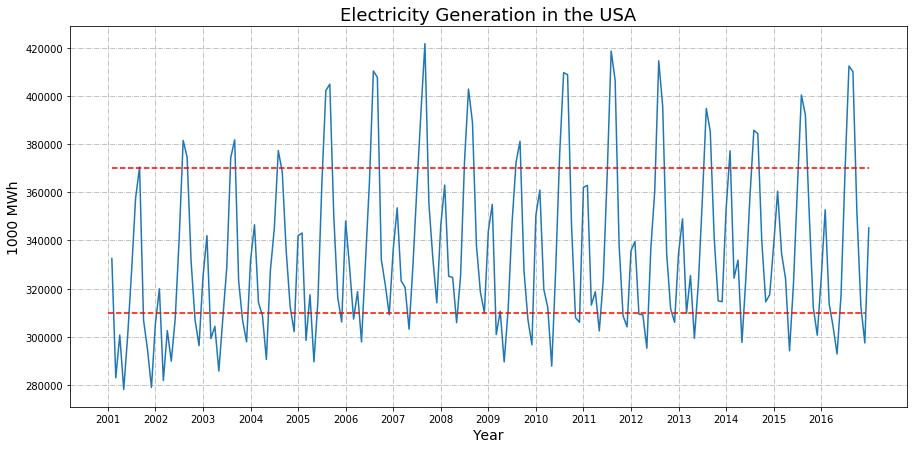

In [7]:
top_limit = 370000
bottom_limit = 310000
top_line = [top_limit for i in range(len(x_vals))]
bottom_line = [bottom_limit for i in range(len(x_vals))]

# Initialize Graph
fig, ax1 = init_graph(1)
set_labels(ax1)

# Plot Graph
ax1.plot(x_vals, y_vals, x_vals, top_line, "r--", bottom_line, "r--")

# X-Axis Ticks
ax1.set_xticklabels(labels)
ax1.xaxis.set_ticks(np.arange(0, n_months, n_months / n_years))

plt.show()

In [8]:
max_vals = []
min_vals = []

for i in range(len(y_vals)):
    curr_val = y_vals[i]
    prev_val = y_vals[i - 1] if i > 0 else 0
    next_val = y_vals[i + 1] if i < len(y_vals) - 1 else 0
    
    # If current value is at the "highest" point.
    if prev_val < curr_val > next_val and curr_val > top_limit:
        max_vals.append(curr_val)
        
    # If current value is at the "lowest" point.
    if prev_val > curr_val < next_val and curr_val < bottom_limit:
        min_vals.append(curr_val)
        
max_avg = np.average(max_vals)
min_avg = np.average(min_vals)
A2 = (max_avg - min_avg) / 2

print("Amplitude: {} (1000 MWh)".format(A2))

Amplitude: 50116.71764705883 (1000 MWh)


<h4>Period and Frequency</h4>
<p>To find the period and frequency of the function, the first step is to determine the intervals of the x-axis. Because each value is energy production value is given within a month, each x value will be displayed in terms of months in an incremental fashion (the years are irrelevant). Next, the period is found by finding the average distance (number of months) between the vertices. After the period is determined, the frequency is calculated with the formula: $\frac{2\pi}{P}$.</p>

In [9]:
def get_periods(vals):
    periods = []
    
    for i in range(len(vals) - 1):
        curr_val = vals[i]
        next_val = vals[i + 1]
        # The month at which y = curr_month and y = next_month
        curr_month = y_vals.index(curr_val)
        next_month = y_vals.index(next_val)
        periods.append(abs(curr_month - next_month))
        
    return periods


periods = []
periods.extend(get_periods(max_vals))
periods.extend(get_periods(min_vals))

P = np.average(periods)
F = 2 * np.pi / P
print("Period: {} months".format(P))
print("Frequency: {}".format(F))

Period: 7.36 months
Frequency: 0.8536936558667916


<p>However, it can be observed that there are only a few significantly large spikes in the graph, and if other spikes (vertices) are rather insignificant, and if they were to be considered as a cylce, would decrease accuracy in the final function. In addition, a pattern can be observed, where each large spike is followed by two smaller, insignificant spike. Therefore, by multiplying the period by 3, the accuracy of the final equation can be increased.</p>

In [10]:
P2 = P * 2
F2 = 2 * np.pi / P2
print("Period: {} months".format(P2))
print("Frequency: {}".format(F2))

Period: 14.72 months
Frequency: 0.4268468279333958


<h4>Horizontal and Vertical Shift</h4>
<p>First, it must be determined if the equation uses sine of cosine, and since a sine function begins at 0, a cosine function will be the one used. Therefore, the horizontal shift is 0. From there, the vertical shift can be determined by finding the average of all data points.</p>

In [11]:
V = np.average(y_vals)
print("Vertical Shift: {} (1000 MWh)".format(V))

Vertical Shift: 335336.1822916667 (1000 MWh)


<h4>Equation</h4>
<p>Finally, using all the calculated coefficients, the equation is derived using the standard format of a sinusoidal equation: $y = A\cos(Fx - H) + V$. From a parent cosine function, the best-fit equation is elongated horizontally by 30711.78600464578 (A), and compressed so that there are 4.691358024691358 (P) cycles within 2&pi; and the frequency is 1.339310552319859 (F). It is also shifted upwards by 335336.1822916667 (V) and the horizontal shift (H) is 0 as the graph of the original set of data resembles the behavior of a cosine function.</p>
<p>Rounded to 3 decimal places, the final equation is:</p>
<br>
$$y = 30711.786\cos(1.339x) + 335336.182$$
<br>
<p>However, using the alternative amplitude and period calculated, the final equation would be: </p>
<br>
$$y = 50116.718\cos(0.446x) + 335336.182$$

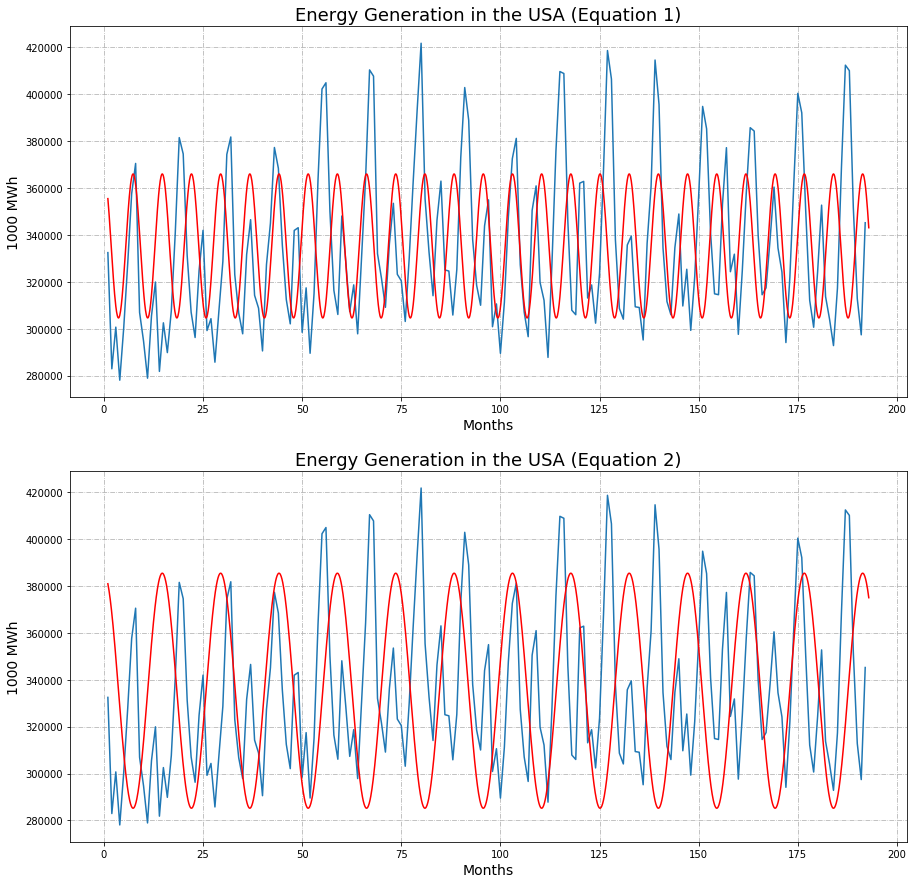

In [12]:
# Equation
x = np.arange(1, len(raw_energy_data) + 1, 0.1)
y1 = A * np.cos(F * x) + V
y2 = A2 * np.cos(F2 * x) + V

# Initialize Figure
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Labels
ax1.set_title("Energy Generation in the USA (Equation 1)", fontsize=18)
ax1.set_xlabel("Months", fontsize=14)
ax1.set_ylabel("1000 MWh", fontsize=14)

ax2.set_title("Energy Generation in the USA (Equation 2)", fontsize=18)
ax2.set_xlabel("Months", fontsize=14)
ax2.set_ylabel("1000 MWh", fontsize=14)

# Grids
ax1.grid(True, linestyle='-.', linewidth=0.75)
ax2.grid(True, linestyle='-.', linewidth=0.75)

# Plot Values
ax1.plot(x_vals, y_vals, x, y1, "r")
ax2.plot(x_vals, y_vals, x, y2, "r")

plt.show()

<h3>Least Square Regression</h3>
<p>It is also possible to derive a best-fit equation using the least square regression method, where various different sinusoids are graphed on the orginal data, and the sum of the square of the errors of each data point is compared. The sinudoidal equation with the least errors will be the best-fit. The final equation found was:</p>
<br>
<p>$$y = 30000\cos(0.55x + 0.36) + 335336.182$$</p>

<h4>Trial 1</h4>
<p>For the amplitude, check all values from 300000 to 650000 with intervals of 1000. For the frequency, check all values from 0.35 to 0.90 in intervals of 0.01. For the sake of complexity, the vertical and horizontal shift will be constant, as to avoid a time complexity greater than $n^2$.</p>

Amplitude: 30000
Frequency: 0.5500000000000002


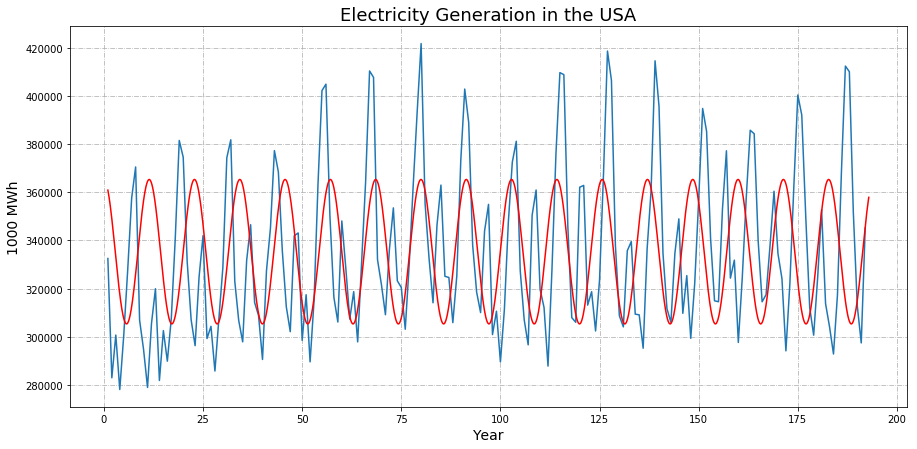

In [13]:
a_range = np.arange(30000, 65000, 1000)
f_range = np.arange(0.35, 0.9, 0.01)
least_error = 2 ** 1000  # A random, huge number.
least_a = 650001
least_f = 1

for a in a_range:
    for f in f_range:
        g = lambda x: a * np.cos(f * x) + V
        sum_errors = sum((y_vals[i - 1] - g(i - 1)) ** 2 for i in x_vals)
        if sum_errors < least_error:
            least_error = sum_errors
            least_a = a
            least_f = f
            
print("Amplitude: {}".format(least_a))
print("Frequency: {}".format(least_f))

# Equation
y3 = least_a * np.cos(least_f * x) + V

# Initialize Graph
fig, ax1 = init_graph(1)
set_labels(ax1)

# Plot Graph
ax1.plot(x_vals, y_vals, x, y3, "r")

plt.show()

<h4>Trial 2</h4>
<p>The new frequency seemed to be more accurate, however, the amplitude looked a little off. Trial 2 attempts to keep the value of the new frequency constant, and make the amplitude and horizontal shift independent. The range of the amplitude remains the same and the horizontal shift ranges from 0 to $\frac{\pi}{2}$ in intervals of 0.1</p>

Amplitude: 30000
Horizontal Shift: 0.36


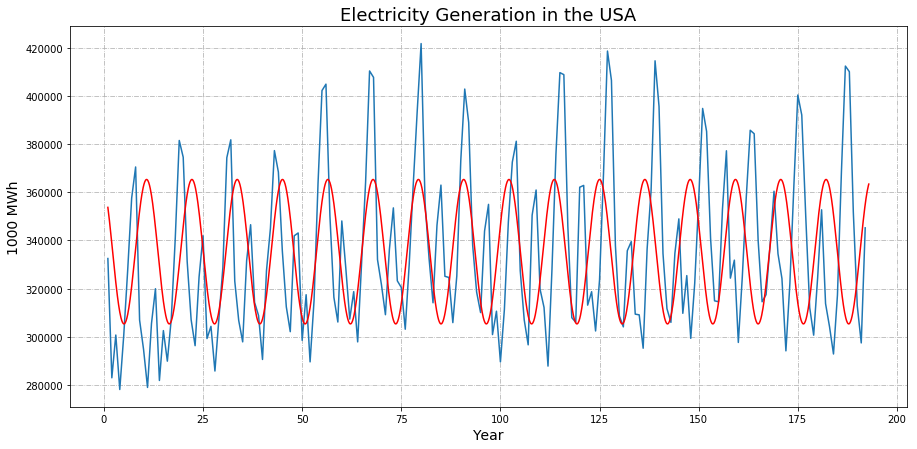

In [14]:
h_range = np.arange(0, np.pi / 2, 0.01)
least_error = 2 ** 1000
least_a = 650001
least_h = np.pi

for a in a_range:
    for h in h_range:
        g = lambda x: a * np.cos(least_f * x + h) + V
        sum_errors = sum((y_vals[i - 1] - g(i - 1)) ** 2 for i in x_vals)
        if sum_errors < least_error:
            least_error = sum_errors
            least_a = a
            least_h = h

print("Amplitude: {}".format(least_a))
print("Horizontal Shift: {}".format(least_h))

# Equation
y4 = least_a * np.cos(least_f * x + least_h) + V

# Initialize Graph
fig, ax1 = init_graph(1)
set_labels(ax1)

# Plot Graph
ax1.plot(x_vals, y_vals, x, y4, "r")

plt.show()

<h3>Conclusion</h3>
<p>The periodic nature observed in the energy generation in the US is likely attributed to the seasonal weather, and the behavior associated with the weather. For example, during winter, more energy would be used to heat houses as compared to the summer, where heating is unecessary. It can be said that the energy generation corresponds to some extent to the seasons, and because the seasons periodically repeat, so does energy generation.</p>
<p>Overall, all equations do not manage to completely fit the data graphed. The first equation captures more points accurately at the cost of being smaller and having a limited range, while the second equation appears to better fit the data, but is likely more inaccurate. The third and fourth equation using the least square regression technique also do not manage to perfectly fit the data points, although being slightly more accurate. The next step would be to use the Fast Fourier Transform (FFT) algorithm in the numpy library to derive an extremely accurate best-fit graph, consisting of multiple sinudoidal functions.</p>